In [1]:
#Plotting a set of canonical cell markers genes from Bakken 2021 & Hodge 2019
import scripts.neurosynth_tools as nt
from scripts.mapping_helpers import get_indices
import pandas as pd
import numpy as np
import os
import nibabel as nb
import matplotlib.pyplot as plt
import matplotlib_surface_plotting as msp
import seaborn as sns
from scripts.plotting_helpers import create_stacked_maps

/home/kwagstyl/anaconda3/envs/lexicon/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


Some functions depend on CIVET, consider installing.


In [2]:
#deleted LINC00507 as not present in AHBA
#interneurons classic
cells={
    'Interneurons':['PVALB', 'SST', 'VIP'],
       'Excitatory neurons':['FEZF2','RORB','THEMIS'],
       'Astroctye':['FGFR3','AQP4'],
       'Microglia':['TYROBP','APBB1IP']}


In [3]:
base_dir = '/data1/allen_surfaces/'
cortex=nb.load(os.path.join(base_dir,'hcp_surfs','fs_LR32k','Glasser_2016.32k.L.label.gii'))
cortex=cortex.darrays[0].data>0
concat=np.load(os.path.join(base_dir,'all_subs_smoothed_z.npy'))
surf=nb.load(os.path.join(base_dir,'hcp_surfs', 'fs_LR32k',
                                'fs_LR.32k.L.inflated.surf.gii'))
gene_names=pd.read_csv('gene_info.csv')['gene.symbol']

In [4]:
cell_maps={}
for k,cell in enumerate(cells.keys()):
    cell_maps[cell]={}
    for marker in cells[cell]:
        map_=concat[gene_names==marker].ravel()
        im=create_stacked_maps([map_],surf,cortex,vmin=-2,vmax=2,cmap='turbo',norm=True, mask=None)
        cell_maps[cell][marker]=im
     

In [5]:
def add_to_ax(ax,im,title):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(marker,size=40)
    return 

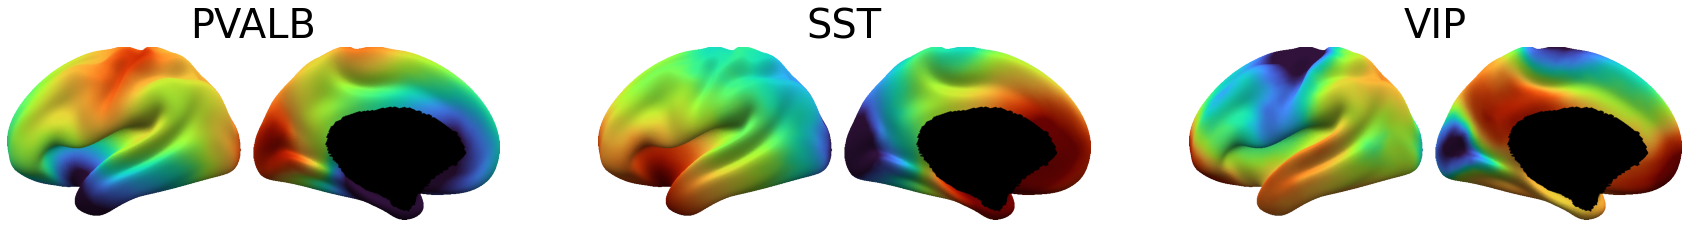

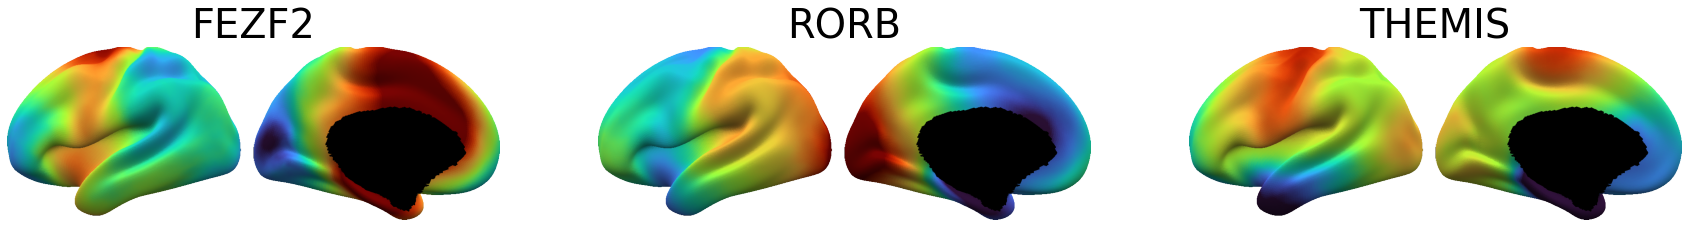

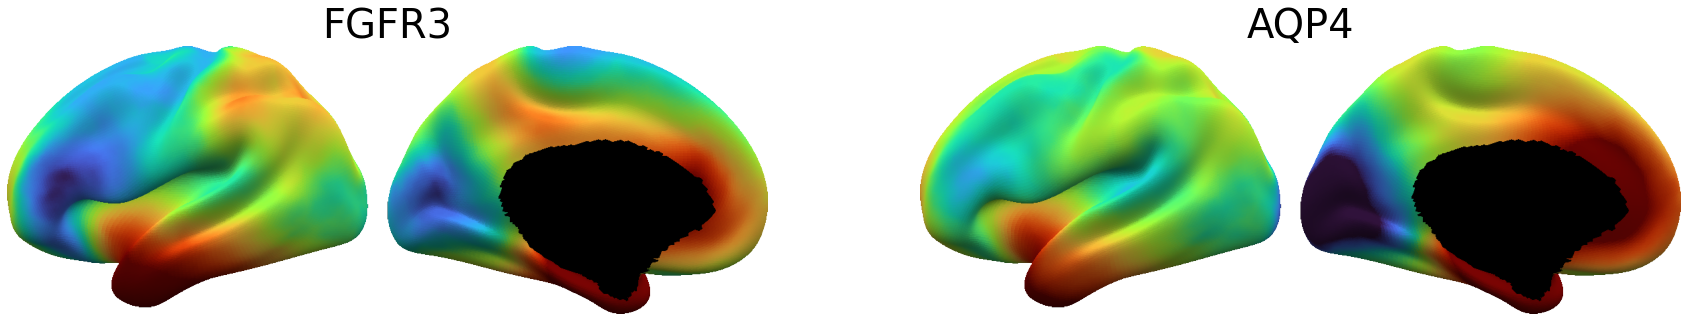

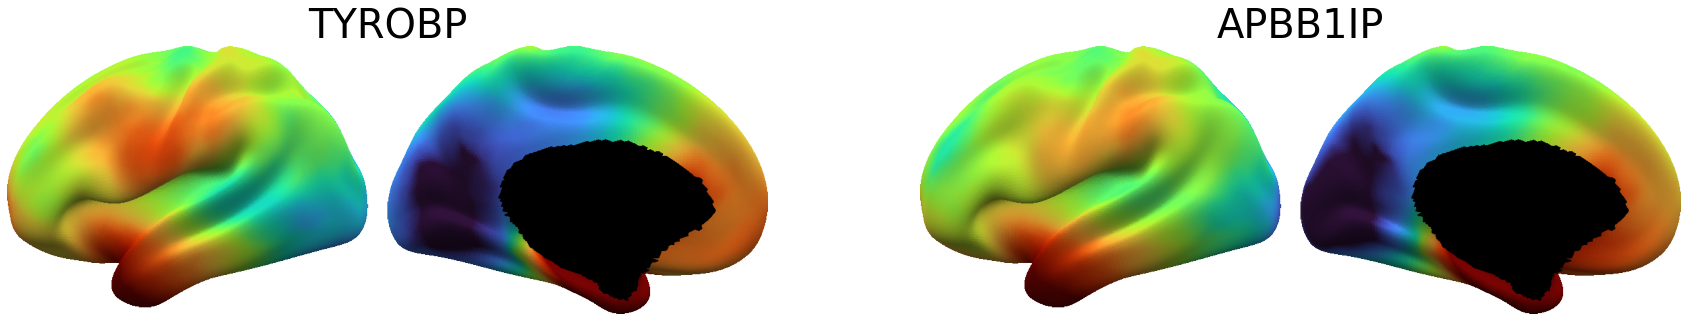

In [13]:
#plot cell maps
for k,cell in enumerate(cells.keys()):
    fig,axes = plt.subplots(1,len(cells[cell]),figsize=(30,30*len(cells[cell])),
                           )
    
    for i_m,marker in enumerate(cells[cell]):
        if len(cells[cell])==1:
            add_to_ax(axes,cell_maps[cell][marker],marker)
        else:
            add_to_ax(axes[i_m],cell_maps[cell][marker],marker)
    fig.savefig(f'figures/cells/{cell}.pdf')